In [0]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, DoubleType, BooleanType, DateType

In [0]:
configs = {"fs.azure.account.auth.type": "OAuth",
"fs.azure.account.oauth.provider.type": "org.apache.hadoop.fs.azurebfs.oauth2.ClientCredsTokenProvider",
"fs.azure.account.oauth2.client.id": "7d772a93-a9e7-485f-8d71-a4ae41b03e58",
"fs.azure.account.oauth2.client.secret": 'H-a8Q~bY3gl9v-oLgWoIMmUc8ZocXgfzTNxesbmm',
"fs.azure.account.oauth2.client.endpoint": "https://login.microsoftonline.com/75df096c-8b72-48e4-9b91-cbf79d87ee3a/oauth2/token"}


dbutils.fs.mount(
source = "abfss://tokyo-olympicdata@tokyoolympicbiddata.dfs.core.windows.net", # contrainer@storageacc
mount_point = "/mnt/tokyo-olympicdata",
extra_configs = configs)

---------------------------------------------------------------------------
ExecutionError                            Traceback (most recent call last)
File <command-3161180145226998>, line 8
      1 configs = {"fs.azure.account.auth.type": "OAuth",
      2 "fs.azure.account.oauth.provider.type": "org.apache.hadoop.fs.azurebfs.oauth2.ClientCredsTokenProvider",
      3 "fs.azure.account.oauth2.client.id": "7d772a93-a9e7-485f-8d71-a4ae41b03e58",
      4 "fs.azure.account.oauth2.client.secret": 'H-a8Q~bY3gl9v-oLgWoIMmUc8ZocXgfzTNxesbmm',
      5 "fs.azure.account.oauth2.client.endpoint": "https://login.microsoftonline.com/75df096c-8b72-48e4-9b91-cbf79d87ee3a/oauth2/token"}
----> 8 dbutils.fs.mount(
      9 source = "abfss://tokyo-olympicdata@tokyoolympicbiddata.dfs.core.windows.net", # contrainer@storageacc
     10 mount_point = "/mnt/tokyo-olympicdata",
     11 extra_configs = configs)

File /databricks/python_shell/dbruntime/dbutils.py:362, in DBUtils.FSHandler.prettify_exception_messag

In [0]:
%fs
ls "/mnt/tokyo-olympicdata"

path,name,size,modificationTime
dbfs:/mnt/tokyo-olympicdata/Athlete2,Athlete2,418492,1716977149000
dbfs:/mnt/tokyo-olympicdata/Athletes.csv,Athletes.csv,418492,1716929593000
dbfs:/mnt/tokyo-olympicdata/AthletesTD/,AthletesTD/,0,1716961726000
dbfs:/mnt/tokyo-olympicdata/Coaches.csv,Coaches.csv,16889,1716929605000
dbfs:/mnt/tokyo-olympicdata/CoachesTD/,CoachesTD/,0,1716961840000
dbfs:/mnt/tokyo-olympicdata/EntriesGender.csv,EntriesGender.csv,1123,1716929617000
dbfs:/mnt/tokyo-olympicdata/EntriesGenderTD/,EntriesGenderTD/,0,1716961841000
dbfs:/mnt/tokyo-olympicdata/Medals.csv,Medals.csv,2414,1716929631000
dbfs:/mnt/tokyo-olympicdata/MedalsTD/,MedalsTD/,0,1716961842000
dbfs:/mnt/tokyo-olympicdata/Teams.csv,Teams.csv,35270,1716929644000


In [0]:
spark

In [0]:
athletes = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/mnt/tokyo-olympicdata/Athletes.csv")
coaches = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/mnt/tokyo-olympicdata/Coaches.csv")
entriesgender = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/mnt/tokyo-olympicdata/EntriesGender.csv")
medals = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/mnt/tokyo-olympicdata/Medals.csv")
teams = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/mnt/tokyo-olympicdata/Teams.csv")

In [0]:
combined_df = athletes.join(entriesgender, "Discipline", "inner")
display(combined_df)

Discipline,PersonName,Country,Female,Male,Total
Cycling Road,AALERUD Katrine,Norway,70,131,201
Artistic Gymnastics,ABAD Nestor,Spain,98,98,196
Rowing,ABAGNALE Giovanni,Italy,257,265,522
Basketball,ABALDE Alberto,Spain,144,144,288
Basketball,ABALDE Tamara,Spain,144,144,288
Handball,ABALO Luc,France,168,168,336
Rowing,ABAROA Cesar,Chile,257,265,522
Swimming,ABASS Abobakr,Sudan,361,418,779
Karate,ABBASALI Hamideh,Islamic Republic of Iran,40,42,82
Wrestling,ABBASOV Islam,Azerbaijan,96,193,289


In [0]:
athletes.show()

+--------------------+--------------------+-------------------+
|          PersonName|             Country|         Discipline|
+--------------------+--------------------+-------------------+
|     AALERUD Katrine|              Norway|       Cycling Road|
|         ABAD Nestor|               Spain|Artistic Gymnastics|
|   ABAGNALE Giovanni|               Italy|             Rowing|
|      ABALDE Alberto|               Spain|         Basketball|
|       ABALDE Tamara|               Spain|         Basketball|
|           ABALO Luc|              France|           Handball|
|        ABAROA Cesar|               Chile|             Rowing|
|       ABASS Abobakr|               Sudan|           Swimming|
|    ABBASALI Hamideh|Islamic Republic ...|             Karate|
|       ABBASOV Islam|          Azerbaijan|          Wrestling|
|        ABBINGH Lois|         Netherlands|           Handball|
|         ABBOT Emily|           Australia|Rhythmic Gymnastics|
|       ABBOTT Monica|United States of .

In [0]:
athletes.printSchema()

root
 |-- PersonName: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Discipline: string (nullable = true)



In [0]:
coaches.show()

+--------------------+--------------------+-----------------+--------+
|                Name|             Country|       Discipline|   Event|
+--------------------+--------------------+-----------------+--------+
|     ABDELMAGID Wael|               Egypt|         Football|    NULL|
|           ABE Junya|               Japan|       Volleyball|    NULL|
|       ABE Katsuhiko|               Japan|       Basketball|    NULL|
|        ADAMA Cherif|       C�te d'Ivoire|         Football|    NULL|
|          AGEBA Yuya|               Japan|       Volleyball|    NULL|
|AIKMAN Siegfried ...|               Japan|           Hockey|     Men|
|       AL SAADI Kais|             Germany|           Hockey|     Men|
|       ALAMEDA Lonni|              Canada|Baseball/Softball|Softball|
|     ALEKNO Vladimir|Islamic Republic ...|       Volleyball|     Men|
|     ALEKSEEV Alexey|                 ROC|         Handball|   Women|
|ALLER CARBALLO Ma...|               Spain|       Basketball|    NULL|
|     

In [0]:
coaches.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Discipline: string (nullable = true)
 |-- Event: string (nullable = true)



In [0]:
entriesgender.show()

+--------------------+------+----+-----+
|          Discipline|Female|Male|Total|
+--------------------+------+----+-----+
|      3x3 Basketball|    32|  32|   64|
|             Archery|    64|  64|  128|
| Artistic Gymnastics|    98|  98|  196|
|   Artistic Swimming|   105|   0|  105|
|           Athletics|   969|1072| 2041|
|           Badminton|    86|  87|  173|
|   Baseball/Softball|    90| 144|  234|
|          Basketball|   144| 144|  288|
|    Beach Volleyball|    48|  48|   96|
|              Boxing|   102| 187|  289|
|        Canoe Slalom|    41|  41|   82|
|        Canoe Sprint|   123| 126|  249|
|Cycling BMX Frees...|    10|   9|   19|
|  Cycling BMX Racing|    24|  24|   48|
|Cycling Mountain ...|    38|  38|   76|
|        Cycling Road|    70| 131|  201|
|       Cycling Track|    90|  99|  189|
|              Diving|    72|  71|  143|
|          Equestrian|    73| 125|  198|
|             Fencing|   107| 108|  215|
+--------------------+------+----+-----+
only showing top

In [0]:
entriesgender.printSchema()

root
 |-- Discipline: string (nullable = true)
 |-- Female: string (nullable = true)
 |-- Male: string (nullable = true)
 |-- Total: string (nullable = true)



In [0]:
entriesgender = entriesgender.withColumn("Female",col("Female").cast(IntegerType()))\
    .withColumn("Male",col("Male").cast(IntegerType()))\
    .withColumn("Total",col("Total").cast(IntegerType()))

In [0]:
entriesgender.printSchema()

root
 |-- Discipline: string (nullable = true)
 |-- Female: integer (nullable = true)
 |-- Male: integer (nullable = true)
 |-- Total: integer (nullable = true)



In [0]:
teams.show()

+-------------+--------------+--------------------+------------+
|     TeamName|    Discipline|             Country|       Event|
+-------------+--------------+--------------------+------------+
|      Belgium|3x3 Basketball|             Belgium|         Men|
|        China|3x3 Basketball|People's Republic...|         Men|
|        China|3x3 Basketball|People's Republic...|       Women|
|       France|3x3 Basketball|              France|       Women|
|        Italy|3x3 Basketball|               Italy|       Women|
|        Japan|3x3 Basketball|               Japan|         Men|
|        Japan|3x3 Basketball|               Japan|       Women|
|       Latvia|3x3 Basketball|              Latvia|         Men|
|     Mongolia|3x3 Basketball|            Mongolia|       Women|
|  Netherlands|3x3 Basketball|         Netherlands|         Men|
|       Poland|3x3 Basketball|              Poland|         Men|
|          ROC|3x3 Basketball|                 ROC|         Men|
|          ROC|3x3 Basket

In [0]:
teams.printSchema()

root
 |-- TeamName: string (nullable = true)
 |-- Discipline: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Event: string (nullable = true)



In [0]:
medals.show()

+----+--------------------+----+------+------+-----+-------------+
|Rank|        Team_Country|Gold|Silver|Bronze|Total|Rank by Total|
+----+--------------------+----+------+------+-----+-------------+
|   1|United States of ...|  39|    41|    33|  113|            1|
|   2|People's Republic...|  38|    32|    18|   88|            2|
|   3|               Japan|  27|    14|    17|   58|            5|
|   4|       Great Britain|  22|    21|    22|   65|            4|
|   5|                 ROC|  20|    28|    23|   71|            3|
|   6|           Australia|  17|     7|    22|   46|            6|
|   7|         Netherlands|  10|    12|    14|   36|            9|
|   8|              France|  10|    12|    11|   33|           10|
|   9|             Germany|  10|    11|    16|   37|            8|
|  10|               Italy|  10|    10|    20|   40|            7|
|  11|              Canada|   7|     6|    11|   24|           11|
|  12|              Brazil|   7|     6|     8|   21|          

In [0]:
medals.printSchema()

root
 |-- Rank: string (nullable = true)
 |-- Team_Country: string (nullable = true)
 |-- Gold: string (nullable = true)
 |-- Silver: string (nullable = true)
 |-- Bronze: string (nullable = true)
 |-- Total: string (nullable = true)
 |-- Rank by Total: string (nullable = true)



In [0]:
medals.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Team_Country: string (nullable = true)
 |-- Gold: integer (nullable = true)
 |-- Silver: integer (nullable = true)
 |-- Bronze: integer (nullable = true)
 |-- Total: integer (nullable = true)
 |-- Rank by Total: integer (nullable = true)



# Find the top countries with the highest number of gold medals


In [0]:
top_gold_medal_countries = medals.orderBy("Gold", ascending=False).select("Team_Country","Gold").show()

+--------------------+----+
|        Team_Country|Gold|
+--------------------+----+
|United States of ...|  39|
|People's Republic...|  38|
|               Japan|  27|
|       Great Britain|  22|
|                 ROC|  20|
|           Australia|  17|
|         Netherlands|  10|
|              France|  10|
|             Germany|  10|
|               Italy|  10|
|                Cuba|   7|
|         New Zealand|   7|
|              Brazil|   7|
|              Canada|   7|
|             Hungary|   6|
|   Republic of Korea|   6|
|               Kenya|   4|
|              Poland|   4|
|      Czech Republic|   4|
|              Norway|   4|
+--------------------+----+
only showing top 20 rows



In [0]:
# Retrieve the top 5 countries with the most gold medals
top_gold_medal_countries = medals.orderBy(col("Gold").desc()).select("Team_Country", "Gold").limit(5)

# Show the result (for verification)
top_gold_medal_countries.show()
# Collect data from Spark DataFrame
top_gold_medal_countries_data = top_gold_medal_countries.collect()

# Extract data into lists
countries = [row['Team_Country'] for row in top_gold_medal_countries_data]
gold_medals = [row['Gold'] for row in top_gold_medal_countries_data]

+--------------------+----+
|        Team_Country|Gold|
+--------------------+----+
|United States of ...|  39|
|People's Republic...|  38|
|               Japan|  27|
|       Great Britain|  22|
|                 ROC|  20|
+--------------------+----+



In [0]:
top_gold_medal_countries = medals.orderBy("Gold", ascending=False).select("Team_Country","Gold").limit(10)
display(top_gold_medal_countries)

Team_Country,Gold
United States of America,39
People's Republic of China,38
Japan,27
Great Britain,22
ROC,20
Australia,17
Netherlands,10
France,10
Germany,10
Italy,10


+--------------------+----+
|        Team_Country|Gold|
+--------------------+----+
|United States of ...|  39|
|People's Republic...|  38|
|               Japan|  27|
|       Great Britain|  22|
|                 ROC|  20|
+--------------------+----+



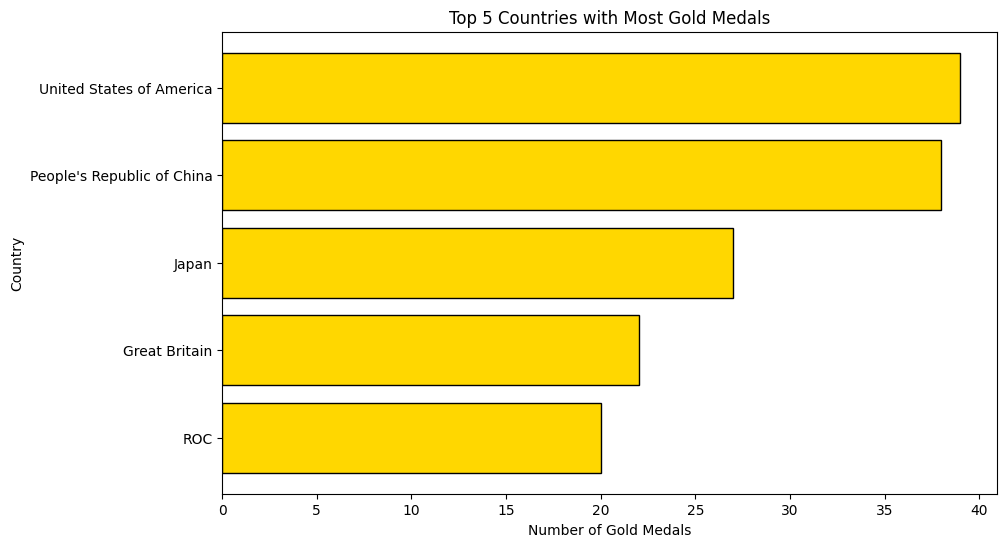

In [0]:
import matplotlib.pyplot as plt

# Retrieve the top 5 countries with the most gold medals
top_gold_medal_countries = medals.orderBy(col("Gold").desc()).select("Team_Country", "Gold").limit(5)

top_gold_medal_countries.show()

top_gold_medal_countries_data = top_gold_medal_countries.collect()

countries = [row['Team_Country'] for row in top_gold_medal_countries_data]
gold_medals = [row['Gold'] for row in top_gold_medal_countries_data]

plt.figure(figsize=(10, 6))
plt.barh(countries, gold_medals, color='gold', edgecolor='black')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Country')
plt.title('Top 5 Countries with Most Gold Medals')
plt.gca().invert_yaxis()  # Invert y-axis to have the country with the most medals on top
plt.show()

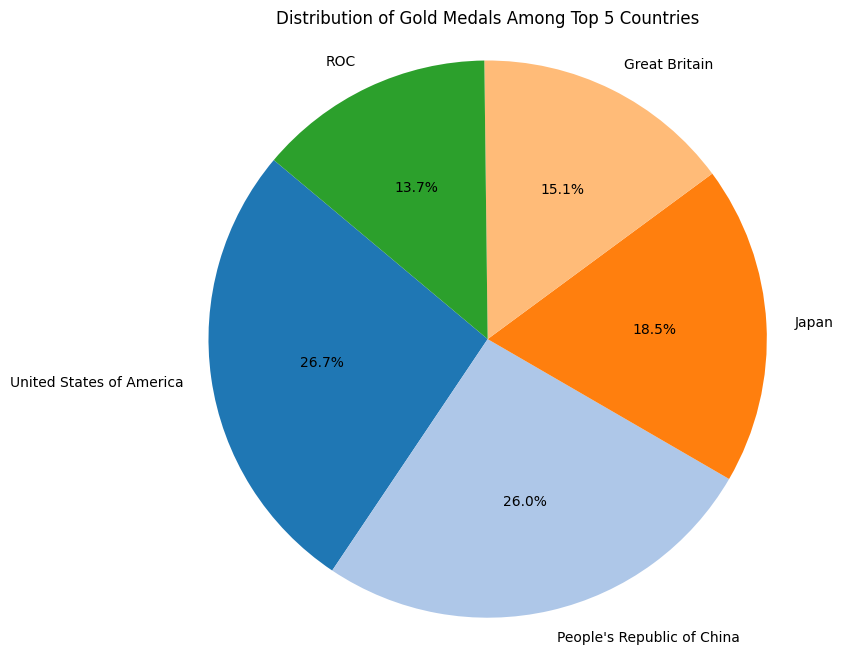

In [0]:
# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(gold_medals, labels=countries, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Gold Medals Among Top 5 Countries')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

# Top 5 Most Played Sports and its gender disposition

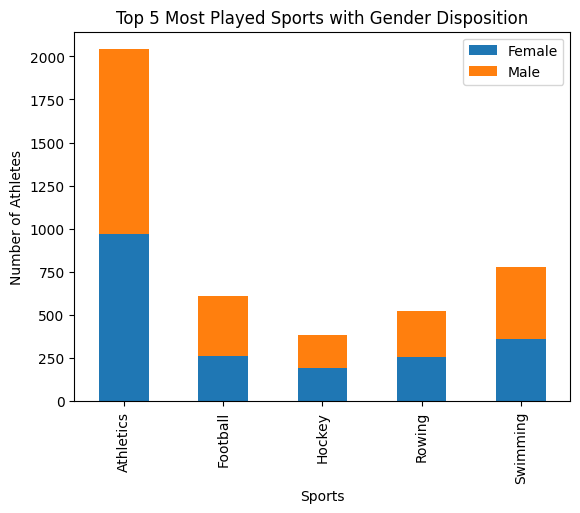

In [0]:
import matplotlib.pyplot as plt

# Filter the top 5 most played sports
top_5_sports = combined_df.groupBy("Discipline").count().orderBy("count", ascending=False).limit(5)

# Join with entriesgender to get the gender disposition
top_5_sports_gender = top_5_sports.join(entriesgender, "Discipline", "inner")

# Convert to Pandas DataFrame for plotting
top_5_sports_gender_pd = top_5_sports_gender.toPandas()

# Plot the stacked bar plot
top_5_sports_gender_pd.plot(x="Discipline", y=["Female", "Male"], kind="bar", stacked=True)

# Set the plot title and labels
plt.title("Top 5 Most Played Sports with Gender Disposition")
plt.xlabel("Sports")
plt.ylabel("Number of Athletes")

# Show the plot
plt.show()

# Calculate the average number of entries by gender for each discipline


In [0]:
average_entries_by_gender = entriesgender.withColumn(
    'Avg_Female', entriesgender['Female'] / entriesgender['Total']
).withColumn(
    'Avg_Male', entriesgender['Male'] / entriesgender['Total']
)
average_entries_by_gender.show()

+--------------------+------+----+-----+-------------------+-------------------+
|          Discipline|Female|Male|Total|         Avg_Female|           Avg_Male|
+--------------------+------+----+-----+-------------------+-------------------+
|      3x3 Basketball|    32|  32|   64|                0.5|                0.5|
|             Archery|    64|  64|  128|                0.5|                0.5|
| Artistic Gymnastics|    98|  98|  196|                0.5|                0.5|
|   Artistic Swimming|   105|   0|  105|                1.0|                0.0|
|           Athletics|   969|1072| 2041| 0.4747672709456149| 0.5252327290543851|
|           Badminton|    86|  87|  173|0.49710982658959535| 0.5028901734104047|
|   Baseball/Softball|    90| 144|  234|0.38461538461538464| 0.6153846153846154|
|          Basketball|   144| 144|  288|                0.5|                0.5|
|    Beach Volleyball|    48|  48|   96|                0.5|                0.5|
|              Boxing|   102

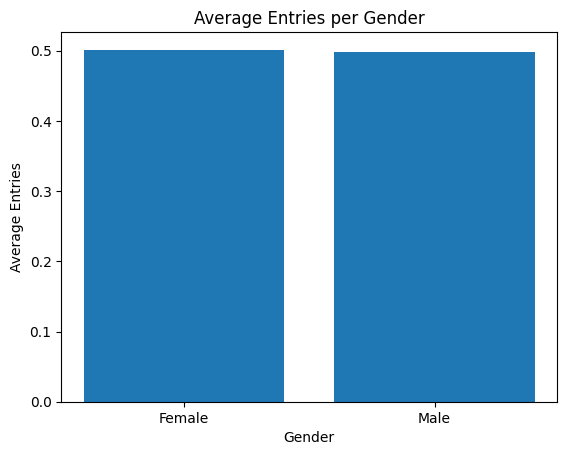

In [0]:
import matplotlib.pyplot as plt

# Calculate average entries per gender
average_entries_by_gender = entriesgender.withColumn(
    'Avg_Female', col('Female') / col('Total')
).withColumn(
    'Avg_Male', col('Male') / col('Total')
).select('Avg_Female', 'Avg_Male')

average_entries_pd = average_entries_by_gender.toPandas()

average_values = average_entries_pd.mean(axis=0)

plt.bar(['Female', 'Male'], average_values, align='center')
plt.xlabel('Gender')
plt.ylabel('Average Entries')
plt.title('Average Entries per Gender')
plt.show()


In [0]:
athletes.repartition(1).write.mode("overwrite").option("header",'true').csv("/mnt/tokyo-olympicdata/AthletesTD")

In [0]:
coaches.repartition(1).write.mode("overwrite").option("header","true").csv("/mnt/tokyo-olympicdata/CoachesTD")
entriesgender.repartition(1).write.mode("overwrite").option("header","true").csv("mnt/tokyo-olympicdata/EntriesGenderTD")
medals.repartition(1).write.mode("overwrite").option("header","true").csv("/mnt/tokyo-olympicdata/MedalsTD")
teams.repartition(1).write.mode("overwrite").option("header","true").csv("/mnt/tokyo-olympicdata/TeamsTD")